# Personality Profiling with Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('/Users/macbookpro/Downloads/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
df

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
0        2016-03-03 02:01:01    768.0   1024.0          9.0       234.0   
1        2016-03-03 02:01:20   1360.0    768.0         12.0       179.0   
2        2016-03-03 02:01:56   1366.0    768.0          3.0       186.0   
3        2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0   
4        2016-03-03 02:02:57   1366.0    768.0          8.0       315.0   
...                      ...      ...      ...          ...         ...   
1015336  2018-11-08 12:04:58   1920.0   1080.0          3.0       160.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015338  2018-11-08 12:07:49   1920.0   1080.0          2.0       135.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0                6    1       GB               51.5448                 0.1991  
1               11    1       MY                3.1698                101.706  
2                7    1       GB               54.9119                -1.3833  
3                7    1       GB                 51.75                  -1.25  
4               17    2       KE                   1.0                   38.0  
...            ...  ...      ...                   ...                    ...  
1015336         10    2       US               39.9883               -75.2208  
1015337          7    1       US                  38.0                  -97.0  
1015338         12    6       US               36.1473                -86.777  
1015339          8    1       US               34.1067              -117.8067  
1015340          9    1       US                  38.0                  -97.0  

[1015341 rows x 110 columns]

In [ ]:
traits = [col for col in df.columns if col.startswith(('EXT', 'EST', 'AGR', 'CSN', 'OPN'))]
df = df[traits]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 100 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  A

In [4]:
print(df.isnull().sum())
df = df.dropna()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
           ... 
OPN6_E     1783
OPN7_E     1783
OPN8_E     1783
OPN9_E     1783
OPN10_E    1783
Length: 100, dtype: int64


In [5]:
df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

mean            std        min     25%     50%     75%  \
EXT1        2.648067       1.264407        0.0     1.0     3.0     4.0   
EXT2        2.773115       1.323943        0.0     2.0     3.0     4.0   
EXT3        3.288349       1.215006        0.0     2.0     3.0     4.0   
EXT4        3.140595       1.237442        0.0     2.0     3.0     4.0   
EXT5        3.276960       1.277593        0.0     2.0     3.0     4.0   
...              ...            ...        ...     ...     ...     ...   
OPN6_E   8256.577482  564269.154434 -7125690.0  2364.0  3337.0  4945.0   
OPN7_E   7689.487616  584198.709790   -61813.0  2279.0  3208.0  4729.0   
OPN8_E   5423.944828  262974.762751   -50012.0  2144.0  3051.0  4469.0   
OPN9_E   6325.801923  429890.560168   -95986.0  2329.0  3269.0  4785.0   
OPN10_E  5336.310631  440822.489835 -3594871.0  1484.0  2192.0  3362.0   

                 max  
EXT1             5.0  
EXT2             5.0  
EXT3             5.0  
EXT4             5.0  
EXT5             5.0  
...              ...  
OPN6_E   272628001.0  
OPN7_E   389143415.0  
OPN8_E   169669331.0  
OPN9_E   347032611.0  
OPN10_E  334428865.0  

[100 rows x 7 columns]

## Data Preprocessing and Exploratory Data Analysis (EDA)

In [6]:
# Detect Outliers (remove)

def find_outliers_IQR(full_data):
    outliers = pd.DataFrame()
    for col in full_data.select_dtypes(include='number').columns:
        q1 = full_data[col].quantile(0.25)
        q3 = full_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outlier_mask = (full_data[col] < lower_bound) | (full_data[col] > upper_bound)
        outliers[col] = full_data[col][outlier_mask]
    return outliers

# print(find_outliers_IQR(df))

def drop_outliers_IQR(full_data):
    for col in full_data.select_dtypes(include='number').columns:
        q1 = full_data[col].quantile(0.25)
        q3 = full_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        full_data = full_data[(full_data[col] >= lower_bound) & (full_data[col] <= upper_bound)]
    return full_data
def treat_outliers_IQR(full_data):
    treated_data = full_data.copy()
    for col in treated_data.select_dtypes(include='number').columns:
        q1 = treated_data[col].quantile(0.25)
        q3 = treated_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        treated_data[col] = treated_data[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    return treated_data

df = drop_outliers_IQR(df)
print(df)


         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
28        2.0   2.0   3.0   5.0   3.0   3.0   1.0   4.0   1.0    3.0  ...   
29        2.0   4.0   4.0   2.0   3.0   3.0   3.0   3.0   3.0    3.0  ...   
73        2.0   3.0   3.0   3.0   3.0   3.0   4.0   3.0   3.0    4.0  ...   
79        3.0   2.0   5.0   3.0   4.0   2.0   4.0   3.0   3.0    3.0  ...   
109       4.0   1.0   4.0   2.0   4.0   3.0   5.0   2.0   5.0    2.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015183   3.0   2.0   4.0   4.0   4.0   4.0   4.0   3.0   3.0    3.0  ...   
1015203   3.0   3.0   3.0   4.0   4.0   3.0   3.0   4.0   3.0    4.0  ...   
1015204   3.0   4.0   4.0   4.0   4.0   2.0   2.0   3.0   4.0    4.0  ...   
1015312   2.0   2.0   2.0   4.0   3.0   2.0   1.0   5.0   1.0    3.0  ...   
1015319   4.0   3.0   4.0   2.0   4.0   2.0   4.0   2.0   5.0    4.0  ...   

         OPN1_E  OPN2_E  OPN3_E  OPN4_E  OPN5_E  OPN6_E  OPN7_E  OPN8_E  \


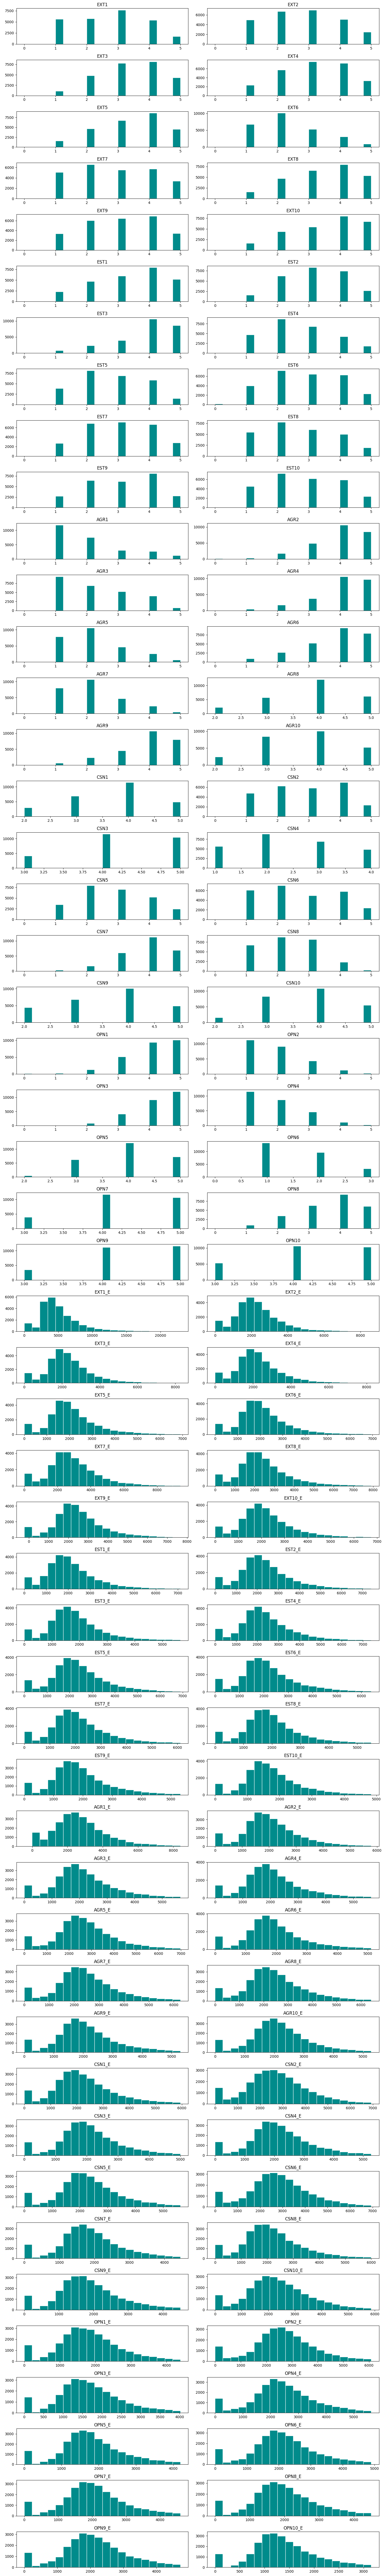

In [7]:
# EDA
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
num_cols = len(numeric_columns.columns)
num_rows = int(np.ceil(num_cols / 2))
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 2))
axs = axs.flatten()
for i, col in enumerate(numeric_columns.columns):
    axs[i].hist(numeric_columns[col], bins=20, edgecolor="white" , color='darkcyan')
    axs[i].set_title(col)

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

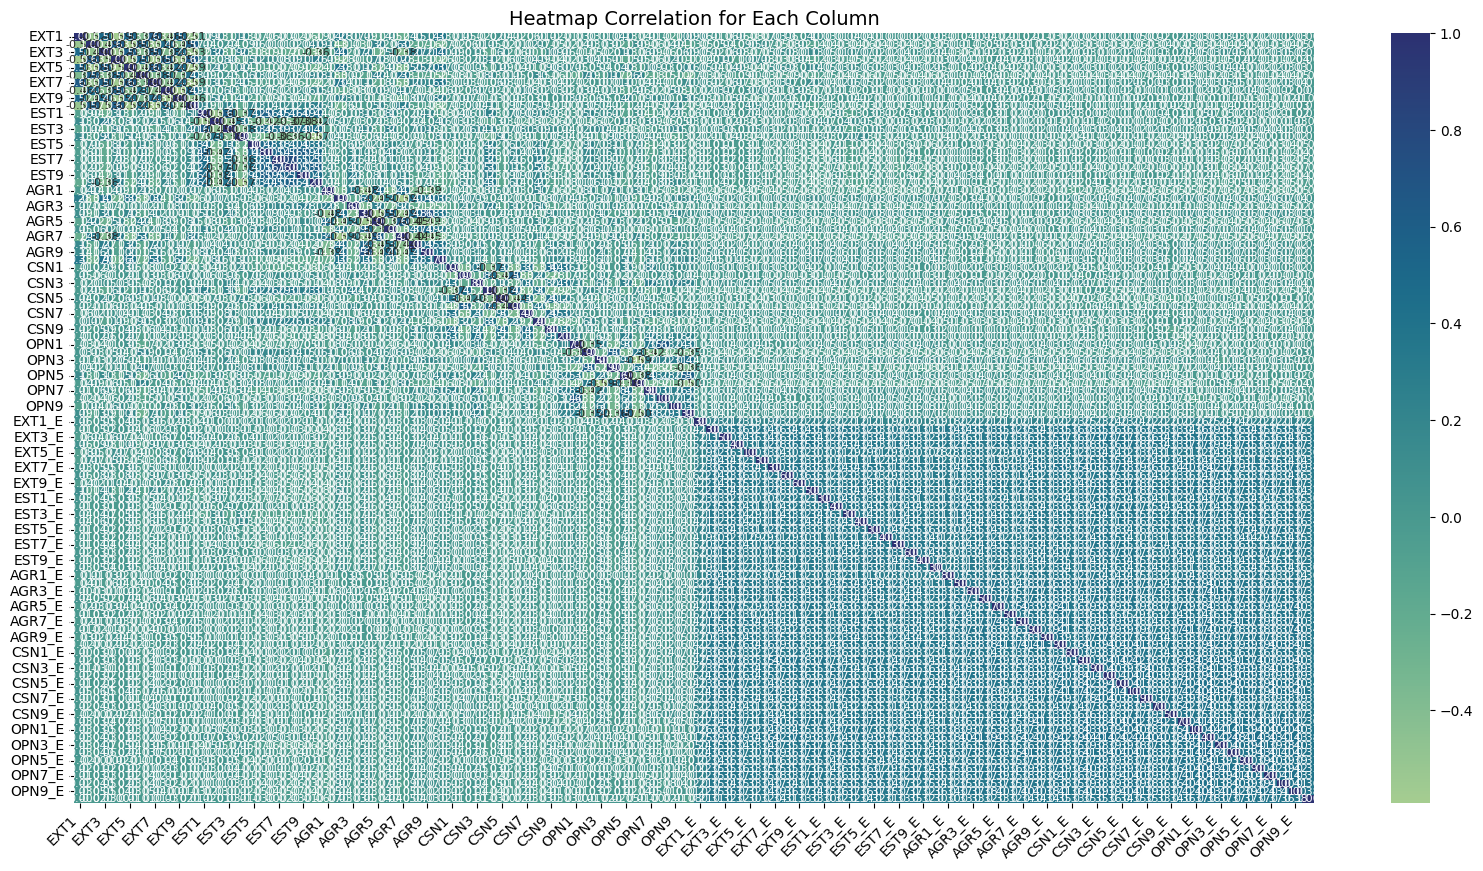

In [8]:
# [Heatmap] --> Correlation For Each Column
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Heatmap Correlation for Each Column", fontsize=14)
plt.show()

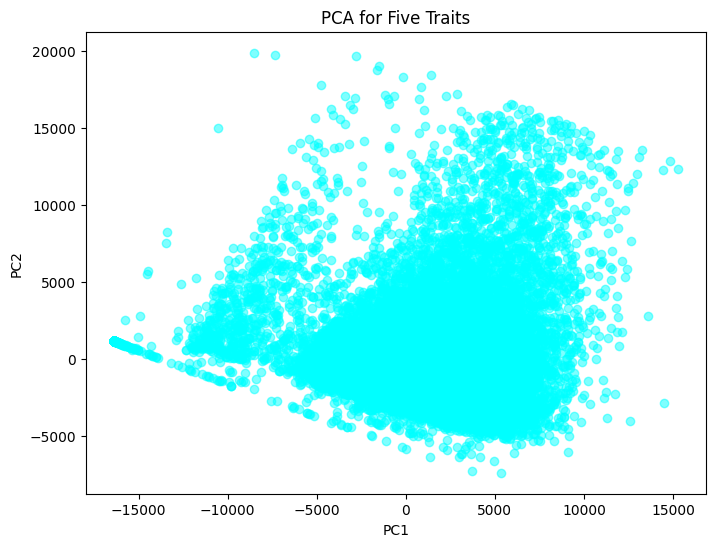

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='cyan')
plt.title("PCA for Five Traits")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

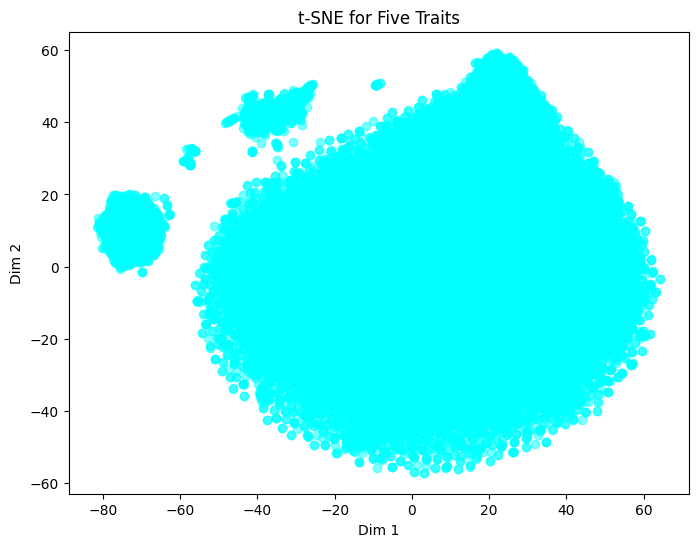

In [13]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5, color='cyan')
plt.title("t-SNE for Five Traits")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-0.57127812, -0.59925913, -0.33953981, ..., -0.47290803,
        -0.65950355, -0.31160365],
       [-0.57127812,  1.01760461,  0.57483617, ..., -0.3648667 ,
        -0.26073229,  1.0019842 ],
       [-0.57127812,  0.20917274, -0.33953981, ..., -0.56690399,
        -0.82805634,  1.5372081 ],
       ...,
       [ 0.25674252,  1.01760461,  0.57483617, ..., -0.00833031,
         1.44740642,  2.41188078],
       [-0.57127812, -0.59925913, -1.25391579, ...,  1.48480085,
        -0.80339008, -0.75209765],
       [ 1.08476317,  0.20917274,  0.57483617, ..., -1.11575394,
        -1.50329529, -0.44580433]])

## Clustering Model Development and Evaluation

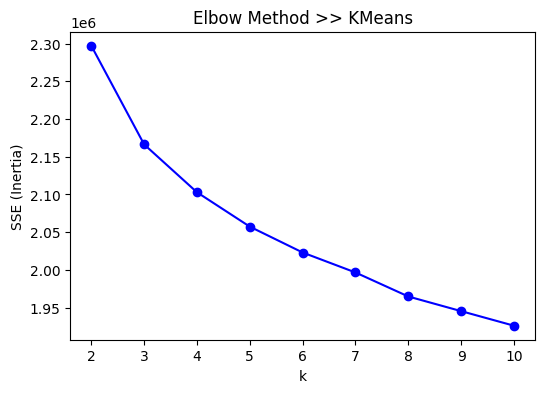

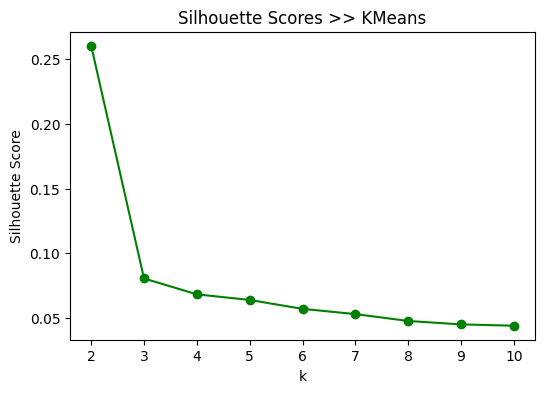

KMeans >> Silhouette Score: 0.06381033071234919
KMeans >> Davies-Bouldin Index: 3.2636428815942926
Hierarchical << Silhouette Score: 0.040076738942293605
Hierarchical << Davies-Bouldin Index: 3.3320822714546923


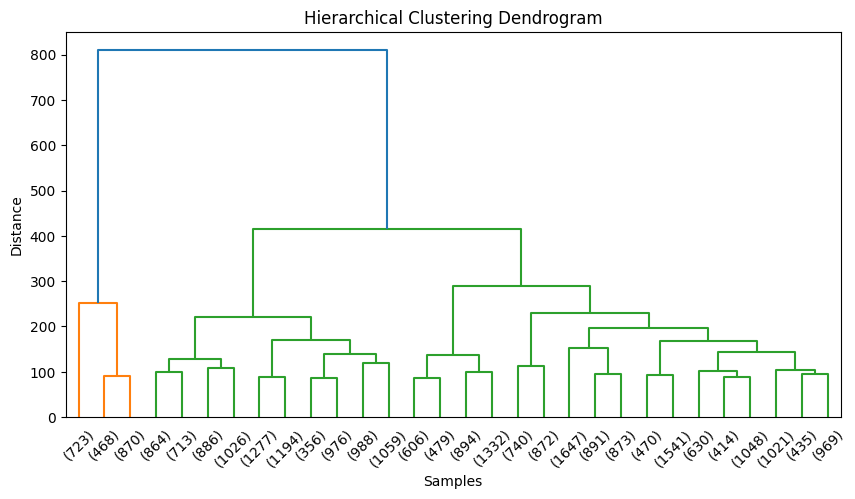

DBSCAN << Silhouette Score: 0.0743000413334531
DBSCAN << Davies-Bouldin Index: 0.9900109503181532


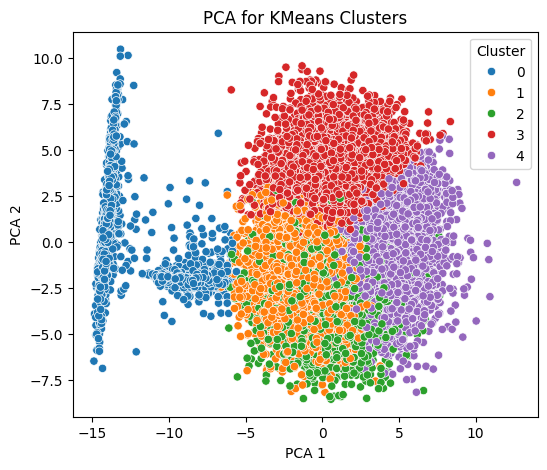

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

sse = []
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sse.append(kmeans.inertia_)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sse, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method >> KMeans')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), scores, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores >> KMeans')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("KMeans >> Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans >> Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
print("Hierarchical << Silhouette Score:", silhouette_score(X_scaled, hc_labels))
print("Hierarchical << Davies-Bouldin Index:", davies_bouldin_score(X_scaled, hc_labels))

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    print("DBSCAN << Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
    print("DBSCAN << Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan_labels))
else:
    print("")

plt.figure(figsize=(6,5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='tab10')
plt.title("PCA for KMeans Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
results = {}

kmeans_lables = kmeans.labels_
kmeans_silhouette = silhouette_score(X_scaled, kmeans_lables)
kmeans_index = davies_bouldin_score(X_scaled, kmeans_lables)

results['KMeans'] = {
    'Silhouette Score': kmeans_silhouette,
    'Davies-Bouldin Index': kmeans_index
}

hierarchical_lables = hc_labels
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_lables)
hierarchical_index = davies_bouldin_score(X_scaled, hierarchical_lables)

results['Hierarchical'] = {
    'Silhouette Score': hierarchical_silhouette,
    'Davies-Bouldin Index': hierarchical_index
}

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan = davies_bouldin_score(X_scaled, dbscan_labels)

    results['DBSCAN'] = {
        'Silhouette Score': dbscan_silhouette,
        'Davies-Bouldin Index': dbscan
    }

for model, scores in results.items():
    print(f"\n{model}")
    for name, value in scores.items():
        print(f"{name}: {value}")



KMeans
Silhouette Score: 0.06381033071234919
Davies-Bouldin Index: 3.2636428815942926

Hierarchical
Silhouette Score: 0.040076738942293605
Davies-Bouldin Index: 3.3320822714546923

DBSCAN
Silhouette Score: 0.0743000413334531
Davies-Bouldin Index: 0.9900109503181532


In [ ]:
def visualize_clusters(data, labels, method='pca', dims=2, title='Cluster Visualization'):
    if method == 'pca':
        reducer = PCA(n_components=dims)
    elif method == 'tsne':
        reducer = TSNE(n_components=dims, random_state=42)
    else:
        print("")
    
    reduced_data = reducer.fit_transform(data)
    
    fig = plt.figure(figsize=(8,6))
    if dims == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(title)
    else:
        sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=labels, palette='viridis', s=50)
        plt.title(title)
    plt.show()

def interpret_clusters(data, labels, trait_columns):
    
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    summary = data_with_labels.groupby('Cluster')[trait_columns].mean()
    print("Average trait scores per cluster:")
    print(summary)
    return summary

def compare_algorithms(data, cluster_label_dict):
    
    scores = {}
    for algo, labels in cluster_label_dict.items():
        score = silhouette_score(data, labels)
        scores[algo] = score
        print(f"{algo} Silhouette Score: {score:.3f}")
    bestAlgo = max(scores, key=scores.get)
    print(f"\nBest performing algorithm: {bestAlgo} with Silhouette Score = {scores[bestAlgo]:.3f}")
    return scores, bestAlgo


## Interpretation & Visualization

In [ ]:
cluster_label_dict = {
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_lables,
    'DBSCAN': dbscan_labels
}

In [ ]:
compare_algorithms(df[traits], cluster_label_dict)

KMeans Silhouette Score: 0.048
Hierarchical Silhouette Score: 0.052
DBSCAN Silhouette Score: 0.142

Best performing algorithm: DBSCAN with Silhouette Score = 0.142


({'KMeans': 0.04822062481164701,
  'Hierarchical': 0.052399586022836425,
  'DBSCAN': 0.14245476870034499},
 'DBSCAN')

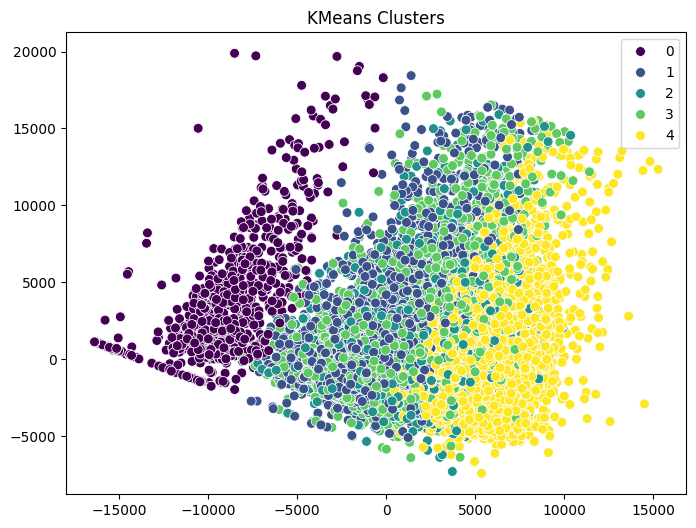

Average trait scores per cluster:
             EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
0        2.711350  2.984834  3.264677  3.129159  3.213796  2.632583  2.785225   
1        2.339333  2.983319  2.946883  3.573164  3.023266  2.466930  2.392742   
2        1.947943  3.587951  2.647355  3.813182  2.519941  2.880772  1.960957   
3        3.523118  1.852928  4.290621  2.188757  4.285337  1.556289  3.861441   
4        2.726193  2.718271  3.423799  3.143964  3.410022  2.322714  2.883072   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
0        3.295988  3.024462  3.435910  ...   303.187867   289.869374   
1        3.731343  2.696078  4.024583  ...  1705.814603  2633.200468   
2        3.902603  2.504618  4.165407  ...  1879.956549  2722.629303   
3        2.698077  3.827389  2.509761 

EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
0        2.711350  2.984834  3.264677  3.129159  3.213796  2.632583  2.785225   
1        2.339333  2.983319  2.946883  3.573164  3.023266  2.466930  2.392742   
2        1.947943  3.587951  2.647355  3.813182  2.519941  2.880772  1.960957   
3        3.523118  1.852928  4.290621  2.188757  4.285337  1.556289  3.861441   
4        2.726193  2.718271  3.423799  3.143964  3.410022  2.322714  2.883072   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
0        3.295988  3.024462  3.435910  ...   303.187867   289.869374   
1        3.731343  2.696078  4.024583  ...  1705.814603  2633.200468   
2        3.902603  2.504618  4.165407  ...  1879.956549  2722.629303   
3        2.698077  3.827389  2.509761  ...  1883.084104  2737.651549   
4        3.486137  2.936628  3.611331  ...  2385.273635  3437.259170   

              OPN3_E       OPN4_E       OPN5_E       OPN6_E       OPN7_E  \
Cluster                                                                    
0         282.342466   296.286204   315.933953   317.233366   299.196673   
1        1533.962248  2366.121891  1805.977173  2098.469710  1998.691689   
2        1767.266583  2552.557725  1901.014484  2237.698783  2100.106423   
3        1780.741230  2576.405255  1843.212388  2200.221342  2133.953765   
4        2151.089375  3073.490787  2277.004822  2725.185982  2568.960565   

              OPN8_E       OPN9_E      OPN10_E  
Cluster                                         
0         311.055773   319.893836   385.107632  
1        1920.311677  2000.203395  1324.182177  
2        2012.741184  2270.680521  1439.794920  
3        2091.263760  2237.743432  1410.793483  
4        2469.939900  2658.574135  1716.863613  

[5 rows x 100 columns]

In [ ]:
visualize_clusters(df[traits], kmeans_labels, method='pca', dims=2, title='KMeans Clusters')
interpret_clusters(df, kmeans_labels, traits)

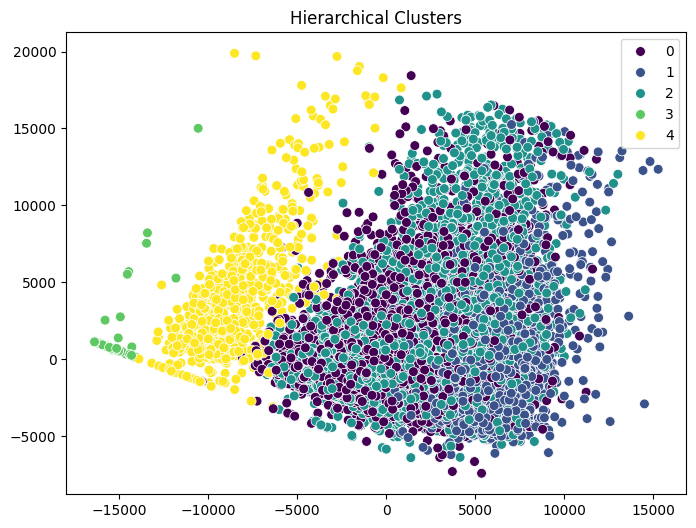

Average trait scores per cluster:
             EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
0        2.127089  3.286555  2.847805  3.718899  2.806510  2.665224  2.176089   
1        2.558442  2.927212  3.244639  3.335548  3.225310  2.475989  2.694050   
2        3.426491  1.947853  4.087376  2.323268  4.123568  1.674805  3.705643   
3        2.573244  2.961136  3.355007  3.171898  3.330344  2.410314  2.675635   
4        2.986169  3.019364  3.096819  3.053942  3.001383  3.049793  3.034578   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
0        3.880963  2.516925  4.133408  ...  1847.350965  2727.788330   
1        3.612202  2.804893  3.775899  ...  2407.145877  3489.459378   
2        2.770425  3.753828  2.689367  ...  1920.766142  2834.132884   
3        3.385650  3.005979  3.582960 

EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
0        2.127089  3.286555  2.847805  3.718899  2.806510  2.665224  2.176089   
1        2.558442  2.927212  3.244639  3.335548  3.225310  2.475989  2.694050   
2        3.426491  1.947853  4.087376  2.323268  4.123568  1.674805  3.705643   
3        2.573244  2.961136  3.355007  3.171898  3.330344  2.410314  2.675635   
4        2.986169  3.019364  3.096819  3.053942  3.001383  3.049793  3.034578   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
0        3.880963  2.516925  4.133408  ...  1847.350965  2727.788330   
1        3.612202  2.804893  3.775899  ...  2407.145877  3489.459378   
2        2.770425  3.753828  2.689367  ...  1920.766142  2834.132884   
3        3.385650  3.005979  3.582960  ...     3.234679     0.639761   
4        3.130014  3.082988  3.159059  ...   916.912863   883.912863   

              OPN3_E       OPN4_E       OPN5_E       OPN6_E       OPN7_E  \
Cluster                                                                    
0        1688.038352  2496.863735  1883.018353  2213.984417  2098.344992   
1        2154.492600  3120.670794  2329.308366  2707.491392  2571.995772   
2        1805.401007  2626.419317  1893.917550  2275.694721  2176.582075   
3           2.376682     0.852765     5.792975     4.634529     3.034380   
4         839.770401   876.619640   921.840941   923.755187   894.998617   

              OPN8_E       OPN9_E      OPN10_E  
Cluster                                         
0        2002.237815  2149.270366  1400.892477  
1        2513.086983  2675.597403  1745.617940  
2        2122.723739  2298.401542  1445.364707  
3           0.980568    14.914051    89.763079  
4         919.113416   905.959889   964.803596  

[5 rows x 100 columns]

In [ ]:
visualize_clusters(df[traits], hierarchical_lables, method='pca', dims=2, title='Hierarchical Clusters')
interpret_clusters(df, hierarchical_lables, traits)

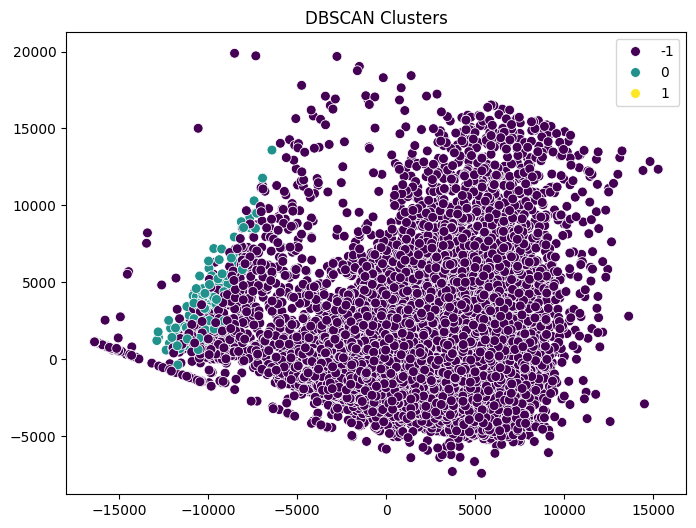

Average trait scores per cluster:
             EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
-1       2.688258  2.739864  3.373339  3.128785  3.361663  2.282914  2.833506   
 0       3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
 1       3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
-1       3.408445  3.033766  3.522759  ...  1831.016615  2682.941771   
 0       3.000000  3.000000  3.000000  ...   637.903704   659.651852   
 1       3.000000  3.000000  3.000000  ...     0.000000     0.000000   

              OPN3_E       OPN4_E       OPN5_E       OPN6_E       OPN7_E  \
Cluster                                                                    
-1       1684.933846  2459.636538  1827.274530 

EXT1      EXT2      EXT3      EXT4      EXT5      EXT6      EXT7  \
Cluster                                                                         
-1       2.688258  2.739864  3.373339  3.128785  3.361663  2.282914  2.833506   
 0       3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
 1       3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

             EXT8      EXT9     EXT10  ...       OPN1_E       OPN2_E  \
Cluster                                ...                             
-1       3.408445  3.033766  3.522759  ...  1831.016615  2682.941771   
 0       3.000000  3.000000  3.000000  ...   637.903704   659.651852   
 1       3.000000  3.000000  3.000000  ...     0.000000     0.000000   

              OPN3_E       OPN4_E       OPN5_E       OPN6_E       OPN7_E  \
Cluster                                                                    
-1       1684.933846  2459.636538  1827.274530  2157.440144  2053.510892   
 0        673.133333   657.148148   699.148148   818.762963   684.051852   
 1          0.000000     0.000000     0.000000     0.000000     0.000000   

              OPN8_E       OPN9_E      OPN10_E  
Cluster                                         
-1       1984.820451  2133.583936  1384.538303  
 0        689.874074   692.703704   818.659259  
 1          0.000000     0.000000   220.500000  

[3 rows x 100 columns]

In [ ]:
visualize_clusters(df[traits], dbscan_labels, method='pca', dims=2, title='DBSCAN Clusters')
interpret_clusters(df, dbscan_labels, traits)